In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
# Read the csv file into a pandas DataFrame

starbucks_census = pd.read_csv('Datasets/starbucks_vs_cafe_count.csv')
starbucks_census.head()

,State/Province,Postcode,Starbucks Count,City,Country,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Cafe Count
0,AK,99501.0,2,Anchorage,US,61.22,-149.89,17.0,38.3,54579.0,39690.0,0
1,AK,99502.0,4,Anchorage,US,61.18,-149.95,24.0,32.8,87250.0,39021.0,0
2,AK,99503.0,1,Anchorage,US,61.18,-149.88,14.0,34.0,46819.0,27693.0,0
3,AK,99504.0,5,Anchorage,US,61.23,-149.74,42.0,31.3,77132.0,31811.0,0
4,AK,99505.0,1,Fort Richardson,US,61.26,-149.68,6.0,21.6,51582.0,19267.0,0


In [4]:
# starbucks_census.columns = ['Postcode','Per Capita Income' 'Median Age', 'Race White','Race African American','Race American Indian']
# starbucks_census.head()

In [98]:
# Assign the data to X and y

X = starbucks_census[[ 'Starbucks Count', 'Population', 'Median Age', 'Per Capita Income']]
y = starbucks_census['Household Income'].values.reshape(-1, 1)
print(X.shape, y.shape)

(6047, 4) (6047, 1)


In [107]:
print(starbucks_census.corr())

                   Postcode  Starbucks Count  Latitude  Longitude  Population  \
Postcode           1.000000         0.199589 -0.050547  -0.889009    0.117975   
Starbucks Count    0.199589         1.000000 -0.032621  -0.244765    0.275425   
Latitude          -0.050547        -0.032621  1.000000   0.043911   -0.184661   
Longitude         -0.889009        -0.244765  0.043911   1.000000   -0.189478   
Population         0.117975         0.275425 -0.184661  -0.189478    1.000000   
Median Age        -0.008803         0.066498 -0.088955  -0.108824    0.204840   
Household Income  -0.022921         0.187418  0.015296  -0.085654    0.195212   
Per Capita Income -0.056634         0.266557 -0.000089  -0.036508    0.057534   
Cafe Count         0.014634        -0.008447 -0.008678  -0.017075    0.006799   

                   Median Age  Household Income  Per Capita Income  Cafe Count  
Postcode            -0.008803         -0.022921          -0.056634    0.014634  
Starbucks Count      0.0664

In [108]:
missing_values = X==np.NAN
X[missing_values==True].head()

,Starbucks Count,Population,Median Age,Per Capita Income
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [109]:
missing_values = y==np.NAN
y[missing_values==True]

array([], dtype=float64)

In [110]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [111]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [112]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7283908304028474
Testing Score: 0.7287810690476573


Text(0.5,1,'Residual Plot')

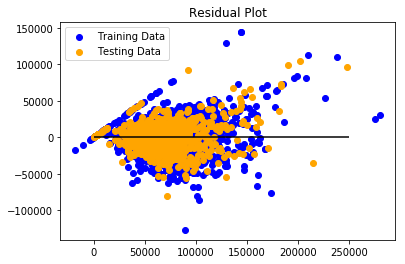

In [113]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

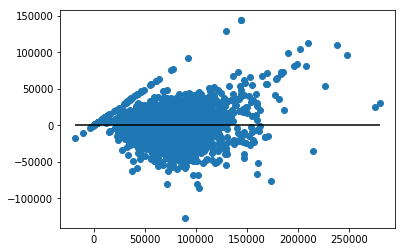

In [114]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Household Income"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Household Income"], y_train)
#axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])